In [2]:
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine

# Load multilingual BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased').to("cuda")

In [43]:
# Sentences to analyze
sentence1 = "Obama visited France on Monday"
sentence2 = "Obama visitó el Lunes Francia"

# Tokenize sentences
tokens1 = tokenizer(sentence1, return_tensors='pt', padding=True, truncation=True)
tokens2 = tokenizer(sentence2, return_tensors='pt', padding=True, truncation=True)

# Get embeddings for each token
with torch.no_grad():
    outputs1 = model(**tokens1.to(model.device))
    outputs2 = model(**tokens2.to(model.device))

# Extract the last hidden states (embeddings)
embeddings1 = outputs1.last_hidden_state.squeeze()[1:-1]
embeddings2 = outputs2.last_hidden_state.squeeze()[1:-1]

# Compute cosine similarity between each token
num_tokens1 = embeddings1.shape[0]
num_tokens2 = embeddings2.shape[0]
cosine_sim = np.zeros((num_tokens1, num_tokens2))

for i in range(num_tokens1):
    for j in range(num_tokens2):
        cosine_sim[i, j] = 1 - cosine(embeddings1[i].cpu().numpy(), embeddings2[j].cpu().numpy())


In [44]:
cosine_sim

array([[0.80500038, 0.58751103, 0.50022606, 0.43063166, 0.37551597,
        0.3953215 , 0.500704  ],
       [0.60626783, 0.71554971, 0.58033833, 0.50250825, 0.36087585,
        0.44767917, 0.49622541],
       [0.67677989, 0.64492768, 0.59532761, 0.58087468, 0.48978305,
        0.51652305, 0.69976096],
       [0.45728437, 0.56350797, 0.47283745, 0.56503416, 0.43569191,
        0.43943163, 0.42306439],
       [0.4624528 , 0.51325125, 0.45905917, 0.49382358, 0.49089601,
        0.49348462, 0.46044477]])

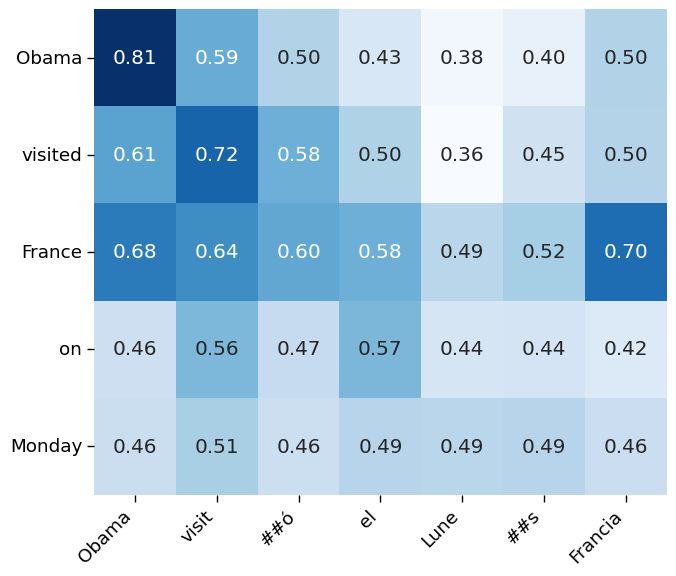

In [49]:
# Plot heatmap of cosine similarity with improved aesthetics

sns.set_context("paper", font_scale=1.5)  # Adjust to make text larger; you can change the scale as needed

plt.figure(figsize=(7, 6))


ax = sns.heatmap(cosine_sim, annot=True, cmap=sns.color_palette("Blues", as_cmap=True),
                 xticklabels=tokenizer.convert_ids_to_tokens(tokens2['input_ids'][0][1:-1]),
                 yticklabels=tokenizer.convert_ids_to_tokens(tokens1['input_ids'][0][1:-1]),
                 cbar=False, 
                fmt=".2f")  # This removes the color bar (legend)

# Improve readability by rotating the tick labels
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels to display horizontally, adjust as needed
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal

#plt.title('Cosine similarity between token embeddings using Multilingual BERT')
# Tight layout for better spacing
plt.tight_layout()


plt.savefig("cosine_similarity_heatmap.pdf")

plt.show()
